# Introducción a los modelos de clasificación

In [88]:
import numpy as np
import pandas as pd
import global_vars as gv
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.tree import plot_tree

In [2]:
diabetes = pd.read_csv(f'{gv.GLOBAL_PATH}/data/Diabetes.csv')

In [3]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.matshow(cm, cmap=plt.cm.Blues)
    plt.xticks([0, 1], labels)
    plt.yticks([0, 1], labels)
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#diag_map = {1: 'Diabetes', 0: 'No Diabetes'}
#diabetes['Outcome'] = diabetes['Outcome'].map(diag_map)

In [9]:
diabetes['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [10]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Preparación de los datos

In [11]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [14]:
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [16]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Regresión Logística (Baseline)

La regresión logística es un modelo de clasificación que se utiliza para predecir la probabilidad de una variable dependiente categórica. En la regresión logística, la variable dependiente es una variable binaria que contiene datos codificados como 1 (sí, éxito, etc.) o 0 (no, fracaso, etc.). En otras palabras, la regresión logística modela la probabilidad de que la variable dependiente sea 1 en función de una o más variables independientes. La regresión logística puede ser binaria o multinomial.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
log_reg = sm.Logit(y_train.reset_index(drop=True), X_train_scaled.reset_index(drop=True)).fit()

Optimization terminated successfully.
         Current function value: 0.529872
         Iterations 6


In [19]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      606
Method:                           MLE   Df Model:                            7
Date:                Sat, 04 May 2024   Pseudo R-squ.:                  0.1791
Time:                        15:26:22   Log-Likelihood:                -325.34
converged:                       True   LL-Null:                       -396.34
Covariance Type:            nonrobust   LLR p-value:                 1.934e-27
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1928      0.118      1.629      0.103      -0.039       0.425
Glucose                      1.0582      0.135      7.826      0.000       0.793       1.323
BloodPressure               -0.2358      0.109     -2.166      0.030      -0.449      -0.022
SkinThickness                0.0513      0.117      0.438      0.662      -0.179       0.281
Insulin                     -0.2320      0.120     -1.936      0.053      -0.467       0.003
BMI                          0.6591      0.122      5.408      0.000       0.420       0.898
DiabetesPedigreeFunction     0.2579      0.109      2.367      0.018       0.044       0.471
Age                          0.3615      0.125      2.898      0.004       0.117       0.606
============================================================================================
"""

In [20]:
np.exp(0.793)

2.2100165407413477

In [21]:
# exponente de los coeficientes
np.exp(log_reg.params)

Pregnancies                 1.212642
Glucose                     2.881142
BloodPressure               0.789937
SkinThickness               1.052689
Insulin                     0.792953
BMI                         1.933131
DiabetesPedigreeFunction    1.294186
Age                         1.435464
dtype: float64

### Interpretación de los exponentes de los coeficientes



### Sin escalar

In [22]:
log_reg = LogisticRegression( max_iter=1500)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1500)

In [23]:
# Predicciones
y_pred = log_reg.predict(X_test)

In [24]:
confusion_matrix(y_test, y_pred)

array([[78, 21],
       [18, 37]])

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



La precisión es una medida de la calidad del clasificador, es decir, la capacidad de un clasificador para no etiquetar como positivo una muestra que es negativa. La exhaustividad es una medida de la cantidad de positivos reales que el clasificador etiqueta como positivos. La puntuación F1 es la media armónica de la precisión y la exhaustividad, donde una puntuación F1 alcanza su mejor valor en 1 (precisión y exhaustividad perfectas) y el peor en 0.

In [26]:
pd.DataFrame(log_reg.coef_, columns=X.columns).T

,0
Pregnancies,0.064372
Glucose,0.034094
BloodPressure,-0.013879
SkinThickness,0.003291
Insulin,-0.001803
BMI,0.102608
DiabetesPedigreeFunction,0.626886
Age,0.037097


In [27]:
pd.DataFrame(np.exp(log_reg.coef_), columns=X.columns)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.066489,1.034682,0.986217,1.003296,0.998198,1.108057,1.871772,1.037794


In [28]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))['accuracy']

precision    0.746753
recall       0.746753
f1-score     0.746753
support      0.746753
Name: accuracy, dtype: float64

### Escalando los datos

In [29]:
log_reg = LogisticRegression(max_iter=1500)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1500)

In [30]:
# Predicciones
y_pred = log_reg.predict(X_test_scaled)

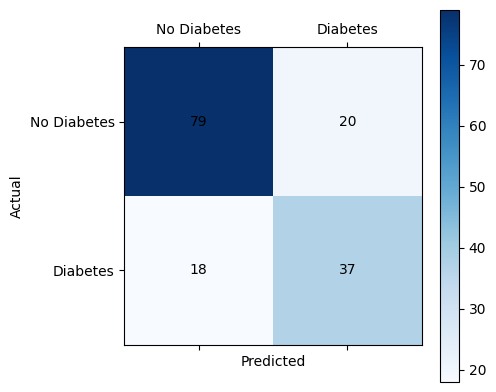

In [31]:
# graficamos la confusion matrix con labels
plot_confusion_matrix(y_test, y_pred, ['No Diabetes', 'Diabetes'])

In [32]:
reporte = classification_report(y_test, y_pred, output_dict=True)
metricas_modelos = pd.DataFrame({'Modelo': ['Regresión Logística (BaseLine)'], 'Accuracy': [reporte['accuracy']], 'Precision': [reporte['macro avg']['precision']], 'Recall': [reporte['macro avg']['recall']], 'F1': [reporte['macro avg']['f1-score']]})
metricas_modelos

,Modelo,Accuracy,Precision,Recall,F1
0,Regresión Logística (BaseLine),0.753247,0.731778,0.735354,0.733418


## Árboles de decisión

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred = tree.predict(X_test)

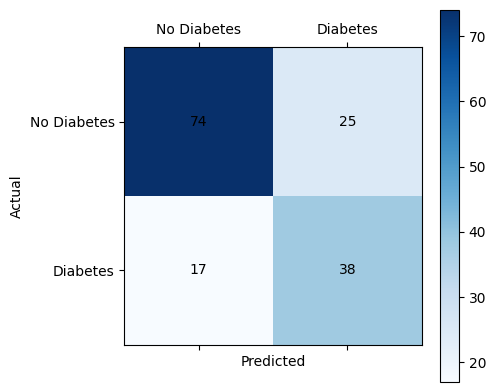

In [36]:
plot_confusion_matrix(y_test, y_pred, ['No Diabetes', 'Diabetes'])

In [37]:
reporte = classification_report(y_test, y_pred, output_dict=True)
metricas_tree = pd.DataFrame({'Modelo': ['Árbol de Decisión'], 'Accuracy': [reporte['accuracy']], 'Precision': [reporte['macro avg']['precision']], 'Recall': [reporte['macro avg']['recall']], 'F1': [reporte['macro avg']['f1-score']]})
metricas_modelos = pd.concat([metricas_modelos, metricas_tree])
metricas_modelos

,Modelo,Accuracy,Precision,Recall,F1
0,Regresión Logística (BaseLine),0.753247,0.731778,0.735354,0.733418
0,Árbol de Decisión,0.727273,0.708181,0.719192,0.711508


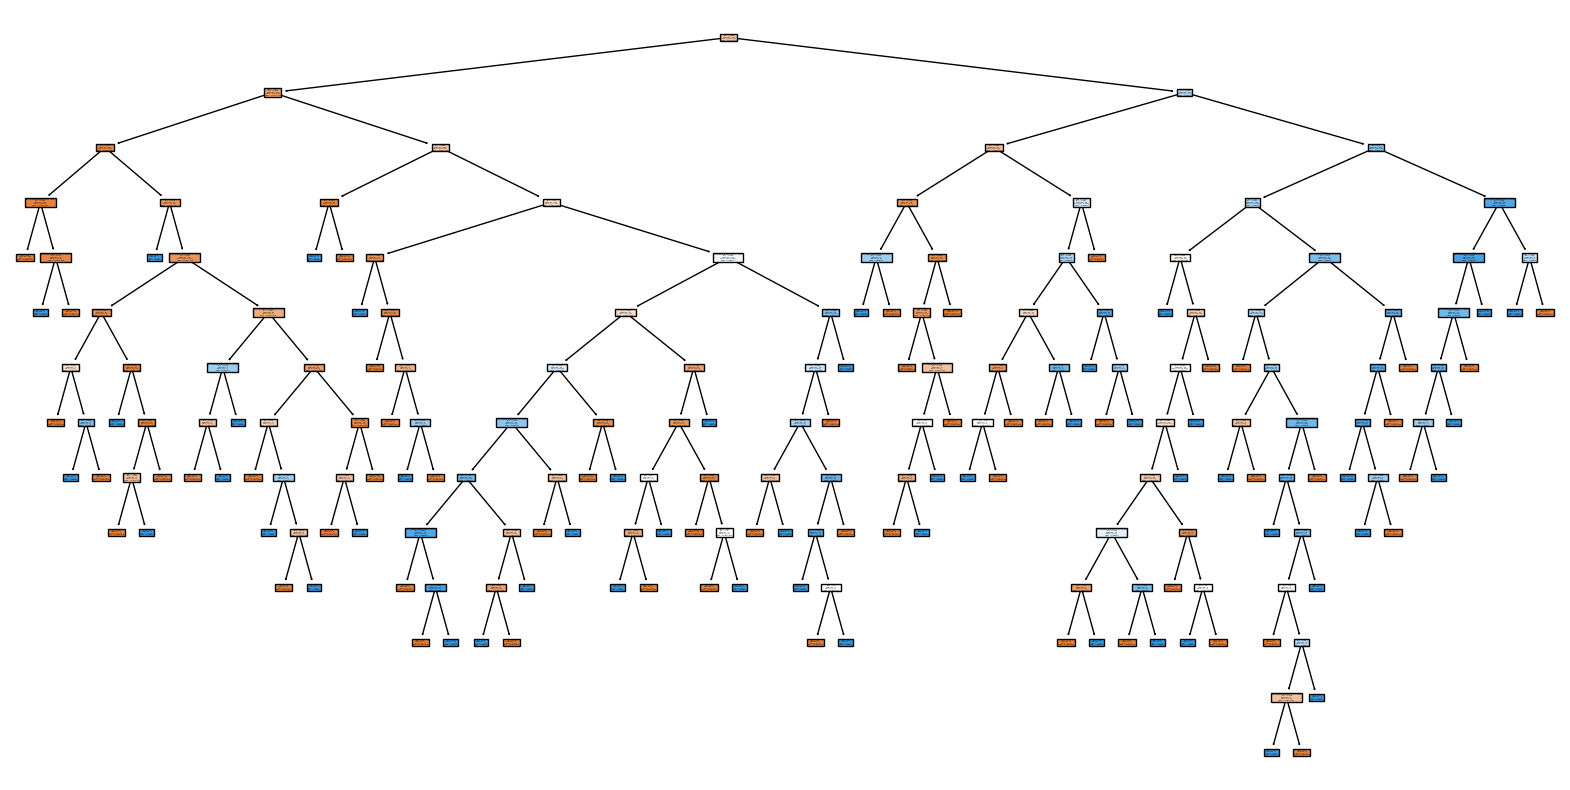

In [38]:
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.show()

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
y_pred = rf.predict(X_test)

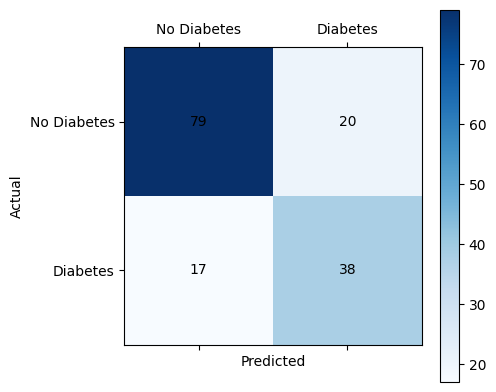

In [42]:
plot_confusion_matrix(y_test, y_pred, ['No Diabetes', 'Diabetes'])

In [43]:
reporte = classification_report(y_test, y_pred, output_dict=True)
metricas_rf = pd.DataFrame({'Modelo': ['Random Forest'], 'Accuracy': [reporte['accuracy']], 'Precision': [reporte['macro avg']['precision']], 'Recall': [reporte['macro avg']['recall']], 'F1': [reporte['macro avg']['f1-score']]})
metricas_modelos = pd.concat([metricas_modelos, metricas_rf])
metricas_modelos

,Modelo,Accuracy,Precision,Recall,F1
0,Regresión Logística (BaseLine),0.753247,0.731778,0.735354,0.733418
0,Árbol de Decisión,0.727273,0.708181,0.719192,0.711508
0,Random Forest,0.759740,0.739045,0.744444,0.741411


In [44]:
# Le damos más peso a la clase positiva (0.6 vs 0.4)
rf = RandomForestClassifier(class_weight={0: 0.5, 1: 0.5})
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.5, 1: 0.5})

In [45]:
# predicciones
y_pred = rf.predict(X_test)

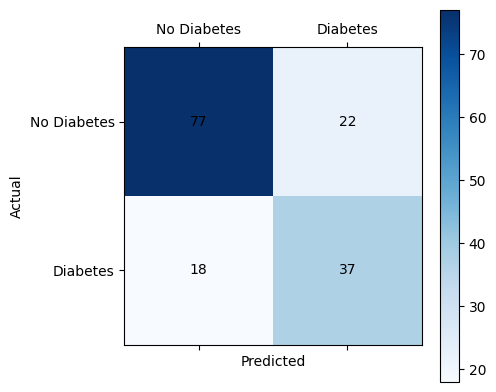

In [46]:
plot_confusion_matrix(y_test, y_pred, ['No Diabetes', 'Diabetes'])

## Naive Bayes (Gaussian -Posible baseline-)

El clasificador Naive Bayes es un clasificador probabilístico basado en el teorema de Bayes que asume que la presencia de una característica particular en una clase no está relacionada con la presencia de cualquier otra característica. Por ejemplo, un fruto puede considerarse una manzana si es rojo, redondo y de aproximadamente 3 pulgadas de diámetro. Incluso si estas características dependen unas de otras o de la existencia de las otras características, todas estas propiedades contribuyen de manera independiente a la probabilidad de que este fruto sea una manzana y es por eso que se llama "ingenuo".

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

GaussianNB()

In [49]:
y_pred = nb.predict(X_test_scaled)

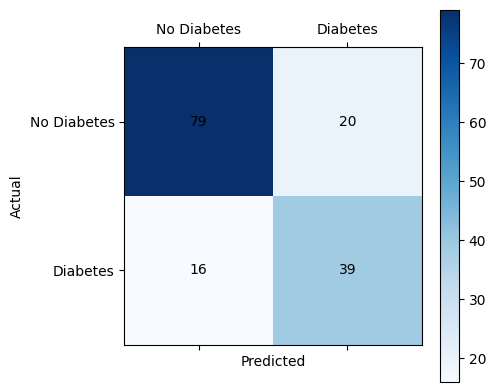

In [50]:
plot_confusion_matrix(y_test, y_pred, ['No Diabetes', 'Diabetes'])

In [51]:
reporte = classification_report(y_test, y_pred, output_dict=True)

In [52]:
metricas_nb = pd.DataFrame({'Modelo': ['Naive Bayes'], 'Accuracy': [reporte['accuracy']], 'Precision': [reporte['macro avg']['precision']], 'Recall': [reporte['macro avg']['recall']], 'F1': [reporte['macro avg']['f1-score']]})
metricas_modelos = pd.concat([metricas_modelos, metricas_nb])
metricas_modelos

,Modelo,Accuracy,Precision,Recall,F1
0,Regresión Logística (BaseLine),0.753247,0.731778,0.735354,0.733418
0,Árbol de Decisión,0.727273,0.708181,0.719192,0.711508
0,Random Forest,0.759740,0.739045,0.744444,0.741411
0,Naive Bayes,0.766234,0.746298,0.753535,0.749322


## Adaboost

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
adb = AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42, algorithm='SAMME')
adb.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=200,
                   random_state=42)

In [55]:
# Predicciones
y_pred = adb.predict(X_test)

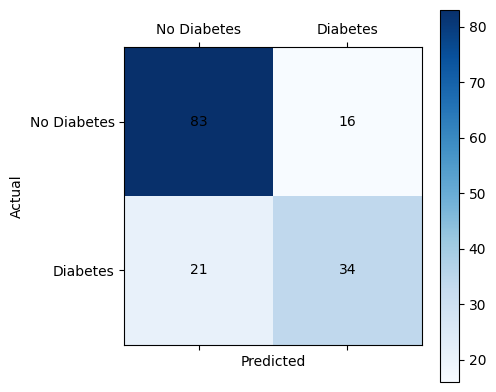

In [56]:
plot_confusion_matrix(y_test, y_pred, ['No Diabetes', 'Diabetes'])

In [57]:
reporte = classification_report(y_test, y_pred, output_dict=True)

In [58]:
metricas_adb = pd.DataFrame({'Modelo': ['Adaboost'], 'Accuracy': [reporte['accuracy']], 'Precision': [reporte['macro avg']['precision']], 'Recall': [reporte['macro avg']['recall']], 'F1': [reporte['macro avg']['f1-score']]})
metricas_modelos = pd.concat([metricas_modelos, metricas_adb])

In [59]:
metricas_modelos

,Modelo,Accuracy,Precision,Recall,F1
0,Regresión Logística (BaseLine),0.753247,0.731778,0.735354,0.733418
0,Árbol de Decisión,0.727273,0.708181,0.719192,0.711508
0,Random Forest,0.759740,0.739045,0.744444,0.741411
0,Naive Bayes,0.766234,0.746298,0.753535,0.749322
0,Adaboost,0.759740,0.739038,0.728283,0.732677


## Máquinas de Soporte Vectorial

Las máquinas de soporte vectorial (SVM) son un conjunto de métodos de aprendizaje supervisado utilizados para la clasificación, regresión y detección de valores atípicos. El modelo SVM representa los puntos de datos en el espacio y separa las clases maximizando el margen entre los puntos de datos de las clases. Los puntos de datos que están en el límite de la separación se denominan vectores de soporte y definen el margen de separación. El objetivo de SVM es encontrar el hiperplano que mejor divide el conjunto de datos en clases. El hiperplano es la línea que maximiza el margen entre las clases. El margen es la distancia entre las líneas de separación de las clases más cercanas a los puntos de datos. El hiperplano se puede utilizar para clasificar nuevos puntos de datos. Los puntos de datos que caen en un lado del hiperplano se clasifican en una clase y los puntos de datos que caen en el otro lado se clasifican en otra clase. Los puntos de datos que caen en el hiperplano son los vectores de soporte.

In [61]:
from sklearn.svm import SVC

In [70]:
svc = SVC( kernel='linear', C=4, random_state=42)
svc.fit(X_train_scaled, y_train)

SVC(C=4, kernel='linear', random_state=42)

In [71]:
y_pred = svc.predict(X_test_scaled)

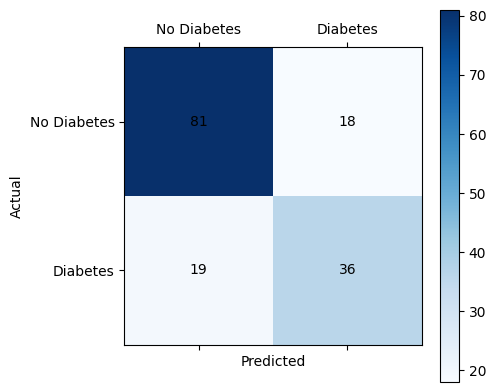

In [72]:
plot_confusion_matrix(y_test, y_pred, ['No Diabetes', 'Diabetes'])

In [73]:
reporte = classification_report(y_test, y_pred, output_dict=True)

In [74]:
metricas_svc = pd.DataFrame({'Modelo': ['Máquinas de Soporte Vectorial'], 'Accuracy': [reporte['accuracy']], 'Precision': [reporte['macro avg']['precision']], 'Recall': [reporte['macro avg']['recall']], 'F1': [reporte['macro avg']['f1-score']]})
metricas_modelos = pd.concat([metricas_modelos, metricas_svc])
metricas_modelos

,Modelo,Accuracy,Precision,Recall,F1
0,Regresión Logística (BaseLine),0.753247,0.731778,0.735354,0.733418
0,Árbol de Decisión,0.727273,0.708181,0.719192,0.711508
0,Random Forest,0.759740,0.739045,0.744444,0.741411
0,Naive Bayes,0.766234,0.746298,0.753535,0.749322
0,Adaboost,0.759740,0.739038,0.728283,0.732677
0,Máquinas de Soporte Vectorial,0.759740,0.738333,0.736364,0.737310


## Gradient Boosting

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [77]:
y_pred = gb.predict(X_test)

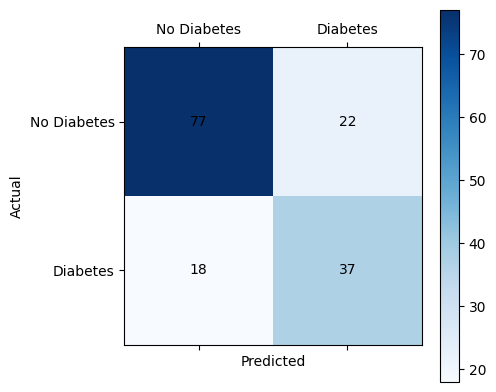

In [78]:
plot_confusion_matrix(y_test, y_pred, ['No Diabetes', 'Diabetes'])

In [79]:
reporte = classification_report(y_test, y_pred, output_dict=True)

In [80]:
metricas_gb = pd.DataFrame({'Modelo': ['Gradient Boosting'], 'Accuracy': [reporte['accuracy']], 'Precision': [reporte['macro avg']['precision']], 'Recall': [reporte['macro avg']['recall']], 'F1': [reporte['macro avg']['f1-score']]})
metricas_modelos = pd.concat([metricas_modelos, metricas_gb])
metricas_modelos

,Modelo,Accuracy,Precision,Recall,F1
0,Regresión Logística (BaseLine),0.753247,0.731778,0.735354,0.733418
0,Árbol de Decisión,0.727273,0.708181,0.719192,0.711508
0,Random Forest,0.759740,0.739045,0.744444,0.741411
0,Naive Bayes,0.766234,0.746298,0.753535,0.749322
0,Adaboost,0.759740,0.739038,0.728283,0.732677
0,Máquinas de Soporte Vectorial,0.759740,0.738333,0.736364,0.737310
0,Gradient Boosting,0.740260,0.718822,0.725253,0.721469


## XGBoost

In [102]:
param = {'booster': 'dart',
         'max_depth': 9, 'learning_rate': 0.01,
         'objective': 'binary:logistic',
         'sample_type': 'uniform',
         'normalize_type': 'tree',
         'rate_drop': 0.1,
         'skip_drop': 0.5}

xgb_clf = xgb.XGBClassifier( **param)
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_clf.fit(X_train, y_train, eval_set=eval_set, eval_metric='error', verbose=True)


/home/chidalgo/git/DS_Course/venv/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-error:0.34691	validation_1-error:0.35714
[1]	validation_0-error:0.34691	validation_1-error:0.35714
[2]	validation_0-error:0.34691	validation_1-error:0.35714
[3]	validation_0-error:0.34691	validation_1-error:0.35714
[4]	validation_0-error:0.34691	validation_1-error:0.35714
[5]	validation_0-error:0.34691	validation_1-error:0.35714
[6]	validation_0-error:0.34691	validation_1-error:0.35714
[7]	validation_0-error:0.34691	validation_1-error:0.35714
[8]	validation_0-error:0.34691	validation_1-error:0.35714
[9]	validation_0-error:0.34691	validation_1-error:0.35714
[10]	validation_0-error:0.34691	validation_1-error:0.35714
[11]	validation_0-error:0.34691	validation_1-error:0.35714
[12]	validation_0-error:0.34691	validation_1-error:0.35714
[13]	validation_0-error:0.34691	validation_1-error:0.35714
[14]	validation_0-error:0.34691	validation_1-error:0.35714
[15]	validation_0-error:0.34691	validation_1-error:0.35714
[16]	validation_0-error:0.34691	validation_1-error:0.35714
[17]	va

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              normalize_type='tree', num_parallel_tree=None, ...)

In [103]:
y_pred = xgb_clf.predict(X_test)

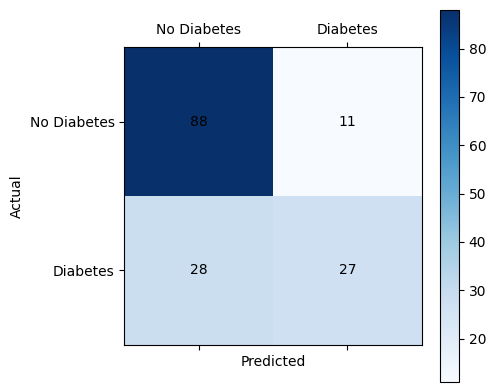

In [104]:
plot_confusion_matrix(y_test, y_pred, ['No Diabetes', 'Diabetes'])

In [105]:
reporte = classification_report(y_test, y_pred, output_dict=True)

In [106]:
metricas_xgb = pd.DataFrame({'Modelo': ['XGBoost'], 'Accuracy': [reporte['accuracy']], 'Precision': [reporte['macro avg']['precision']], 'Recall': [reporte['macro avg']['recall']], 'F1': [reporte['macro avg']['f1-score']]})
metricas_modelos = pd.concat([metricas_modelos, metricas_xgb])

In [107]:
metricas_modelos.drop_duplicates(inplace=True)

In [108]:
metricas_modelos

,Modelo,Accuracy,Precision,Recall,F1
0,Regresión Logística (BaseLine),0.753247,0.731778,0.735354,0.733418
0,Árbol de Decisión,0.727273,0.708181,0.719192,0.711508
0,Random Forest,0.759740,0.739045,0.744444,0.741411
0,Naive Bayes,0.766234,0.746298,0.753535,0.749322
0,Adaboost,0.759740,0.739038,0.728283,0.732677
0,Máquinas de Soporte Vectorial,0.759740,0.738333,0.736364,0.737310
0,Gradient Boosting,0.740260,0.718822,0.725253,0.721469
0,XGBoost,0.707792,0.687062,0.695960,0.689891
0,XGBoost,0.759740,0.738333,0.736364,0.737310
0,XGBoost,0.720779,0.698936,0.706061,0.701645
